# Importing Required Libraries

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,classification_report,accuracy_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Converting dataset to train models
    since the dataset is already preprocessed,
        - I combined X_Train and Y_Train based on ID and droped the ID column because the IDs' are all unique and doestn't contribute except mapping the
        - I mapped the attributes to variable X and the target to y
        - I just removed the ID column from X_Test and Y_Test, this will not affect the data when testing the model

In [5]:
X_test = pd.read_csv("Test_20\\Test_20\\X_Test_Data_Input.csv")
Y_test = pd.read_csv("Test_20\\Test_20\\Y_Test_Data_Target.csv")
X_train = pd.read_csv("Train_60\\Train_60\\X_Train_Data_Input.csv")
Y_train = pd.read_csv("Train_60\\Train_60\\Y_Train_Data_Target.csv")

data = pd.merge(X_train, Y_train, on='ID')

data = data.drop(columns=['ID'])

X = data.drop(columns=['target'])
y = data['target']
X_test = X_test.drop(columns=['ID'])
Y_test = Y_test.drop(columns=['ID'])

### Visualization of dataset

<Axes: xlabel='target', ylabel='Count'>

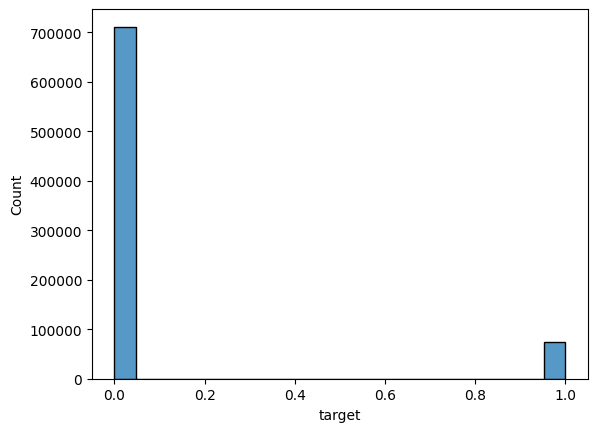

In [6]:
sns.histplot(data['target'])

In [7]:
print(f"X train :{len(X)}")
print(f"Y train :{len(y)}")
print(f"X test :{len(X_test)}")
print(f"Y test :{len(Y_test)}")

count_train = Y_train['target'].value_counts()

count_test = Y_test['target'].value_counts()

print(f"\ny_train:\n{count_train}\n")
print(f"y_test:\n{count_test}")

X train :785133
Y train :785133
X test :261712
Y test :261712

y_train:
target
0    711100
1     74033
Name: count, dtype: int64

y_test:
target
0    237034
1     24678
Name: count, dtype: int64


# Ensemble Learning: An Overview

Ensemble learning is a powerful technique in machine learning where multiple models, often referred to as "learners" or "weak learners," are combined to solve a particular problem. The core idea behind ensemble learning is that by aggregating the predictions of multiple models, the ensemble model can achieve better performance and generalization than any of the individual models alone.

Advantages of Ensemble Learning:

    1.Improved Accuracy: By combining multiple models, ensemble learning can achieve higher accuracy and robustness than individual models.
    2.Reduced Overfitting: Ensembles are less likely to overfit because the variance of the individual models tends to cancel out.
    3.Flexibility: Ensembles can combine models of different types, making them flexible and adaptable to various tasks.

# Machine Learning Models for Classification

In this project, we utilized multiple machine learning algorithms to build a robust classification model. The goal was to apply various ensemble techniques to predict the target outcome based on a set of input features.

## Models Used:

1. **Random Forest**  
   - Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training. For classification tasks, it outputs the mode of the classes (majority vote).

2. **XGBoost (Extreme Gradient Boosting)**  
   - XGBoost is an optimized distributed gradient boosting library designed to be highly efficient and flexible. It uses an ensemble of decision trees and enhances performance by focusing on reducing the loss of previously misclassified samples.

3. **LightGBM (Light Gradient Boosting Machine)**  
   - LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed for performance and efficiency, especially on large datasets. It focuses on leaf-wise growth for faster computation.

4. **CatBoost**  
   - CatBoost is another gradient boosting algorithm developed by Yandex. It is particularly effective for handling categorical features and achieving fast training with superior accuracy.

5. **HistGradientBoostingClassifier**  
   - Histogram-based Gradient Boosting is a fast implementation of the Gradient Boosting algorithm that uses histograms to speed up the training process. It is optimized for both numerical stability and computational efficiency.

## Function Overview

The machine learning training functions are designed to perform hyperparameter tuning and model evaluation in a consistent and efficient manner. The core function works as follows:

1. **Model Initialization**: Each function begins by initializing the respective machine learning model (e.g., Random Forest, XGBoost, LightGBM, CatBoost, HistGradientBoosting) with predefined parameters like `random_state` to ensure reproducibility.

2. **Hyperparameter Grid Definition**: A grid of hyperparameters is defined, covering important parameters like the number of estimators, maximum tree depth, learning rates, and regularization parameters. These grids allow us to search for the best configuration.

3. **Grid Search with Cross-Validation**: 
   - We utilize **GridSearchCV**, which performs an exhaustive search over the specified parameter grid using cross-validation. 
   - Cross-validation ensures the model is trained and validated on different subsets of the data to avoid overfitting and select robust parameters.

4. **Model Training**: The model is trained using the training data (`X_train`, `y_train`). Once the best hyperparameters are identified, the model is retrained using the full training set.

5. **Model Evaluation**: After training, the model's performance is evaluated on the test data (`X_test`, `y_test`) using metrics like accuracy. The function prints the best hyperparameters and the test set accuracy.

6. **Return**: The function returns the following:
   - The best model instance (`best_model`)
   - The best hyperparameters (`best_params`)
   - The accuracy on the test set (`accuracy`)

This function was applied to several ensemble learning algorithms, including Random Forest, XGBoost, LightGBM, CatBoost, and HistGradientBoosting, each with its own set of relevant hyperparameters.


# Random Forest Algorithm

In [12]:
def train_random_forest(X_train, y_train, X_test, y_test):
    
    rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')

    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)


    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print('Best Hyperparameters:')
    print(best_params)

    best_rf_model.fit(X_train, y_train)

    y_pred = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy on Separate Test Set: {accuracy}')

    return best_rf_model, best_params, accuracy


In [15]:
randomForest_Model,par,acc = train_random_forest(X_train=X,y_train=y,X_test=X_test,y_test=Y_test)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on Separate Test Set: 0.9760538301644556


In [16]:
import joblib
joblib.dump(randomForest_Model, 'Models\\random_forest_model.pkl')

['D:\\GST\\Models\\random_forest_model.pkl']

---

# XG Boost Algorithm

In [17]:
def train_xgb_classifier(X_train,y_train,X_test,y_test):
    
    xgb_model = XGBClassifier(random_state=0)

    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print('Best Hyperparameters:')
    print(best_params)

    best_xgb_model.fit(X_train, y_train)

    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')
    
    return best_xgb_model, best_params,accuracy

In [18]:
xgb_model,xgb_param,xgb_acc = train_xgb_classifier(X_train=X,y_train=y,X_test=X_test,y_test=Y_test)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Accuracy on Test Set: 0.98


In [19]:
joblib.dump(xgb_model, 'Models\\xgb_model.pkl')

['D:\\GST\\Models\\xgb_model.pkl']

---

# HistGradient Boost Algorithm

In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier

def train_hist_gradient_boosting_classifier(X_train, y_train, X_test, y_test):
    hgb_model = HistGradientBoostingClassifier(random_state=0)
    
    param_grid = {
        'max_iter': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }

    grid_search = GridSearchCV(hgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_hgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print('Best Hyperparameters:')
    print(best_params)

    y_pred = best_hgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')
    
    return best_hgb_model, best_params, accuracy


In [24]:
hist_Boost_Model , ada_Params , Ada_acc = train_hist_gradient_boosting_classifier(X_train=X,y_train=y,X_test=X_test,y_test=Y_test)

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 200}
Accuracy on Test Set: 0.98


In [25]:
joblib.dump(hist_Boost_Model, 'Models\\hist_Boost_Model.pkl')

['D:\\GST\\Models\\hist_Boost_Model.pkl']

---

# Light Gradient Boost Algorithm

In [28]:
def train_lgb_classifier(X_train=X, y_train=y, X_test=X_test, y_test=Y_test):
    
    lgb_model = lgb.LGBMClassifier(random_state=0)

    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_lgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print('Best Hyperparameters:')
    print(best_params)

    best_lgb_model.fit(X_train, y_train)

    y_pred = best_lgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')
    
    return best_lgb_model, best_params, accuracy


In [ ]:
lgb_model , lgb_param , lgb_acc = train_lgb_classifier()

In [30]:
joblib.dump(lgb_model, 'Models\\lgb_model.pkl')

['D:\\GST\\Models\\lgb_model.pkl']

---

# Cat Boost Algorithm

In [31]:
def train_cb_classifier(X_train=X, y_train=y, X_test=X_test, y_test=Y_test):
    
    cb_model = cb.CatBoostClassifier(random_state=0, verbose=0)  

    param_grid = {
        'iterations': [50, 100, 150],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }

    grid_search = GridSearchCV(cb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_cb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print('Best Hyperparameters:')
    print(best_params)

    best_cb_model.fit(X_train, y_train)

    y_pred = best_cb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on Test Set: {accuracy:.2f}')
    
    return best_cb_model, best_params, accuracy


In [32]:
cb_model , cb_params ,cb_acc = train_cb_classifier()

Best Hyperparameters:
{'depth': 7, 'iterations': 150, 'learning_rate': 0.2, 'subsample': 0.8}
Accuracy on Test Set: 0.98


In [33]:
joblib.dump(cb_model, 'Models\\cb_model.pkl')

['D:\\GST\\Models\\cb_model.pkl']